importing tensorflow and other libraries

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


loading the dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


assigning classnames

In [ ]:
class_name = ['t-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

exploring the dataset

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

process the data

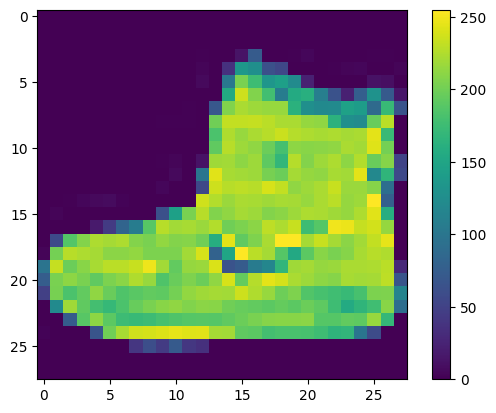

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

showing the processed images

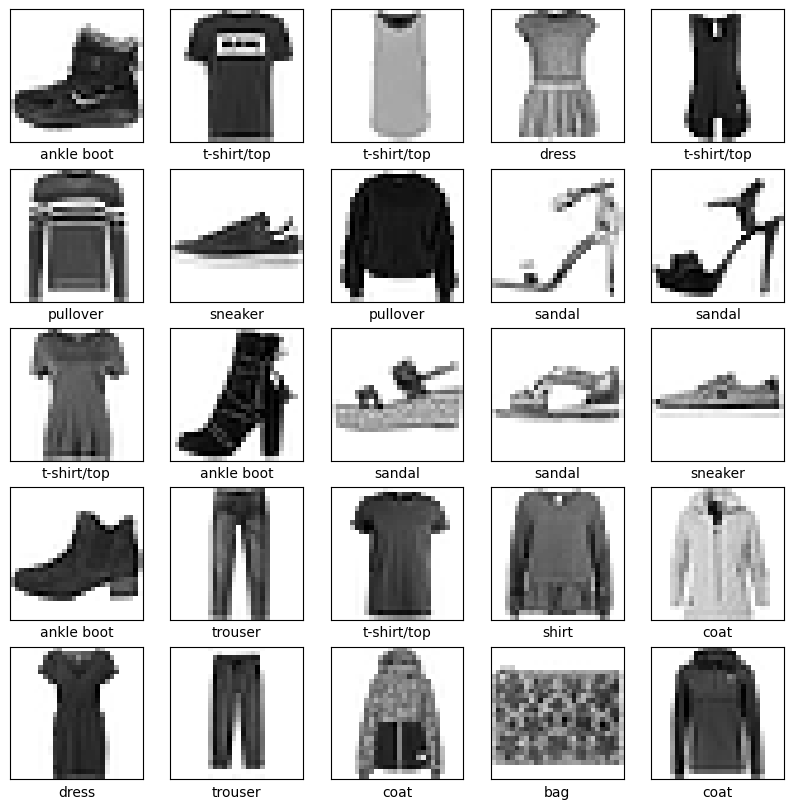

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()




building the model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)

])

compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

training the model

In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4999 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3733 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3322 - accuracy: 0.8791
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3096 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2919 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2790 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

evaluate accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('\ntest accuray :' ,test_acc)

313/313 - 0s - loss: 0.3464 - accuracy: 0.8787 - 439ms/epoch - 1ms/step

test accuray : 0.8787000179290771


make predictions

In [ ]:
probabilty_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probabilty_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 1ms/step


array([2.0197037e-06, 7.9152068e-10, 1.1675372e-07, 5.5268761e-06,
       6.6757252e-08, 3.6133523e-04, 1.0171559e-07, 8.1933191e-04,
       4.7598843e-07, 9.9881101e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

verify the predictions

In [ ]:
def plot_image(i, prediction_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction_array)
  if predicted_label == true_label:
    color = 'blue'
  else :
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],100*np.max(prediction_array),class_name[true_label]),color=color)






In [ ]:

 def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')





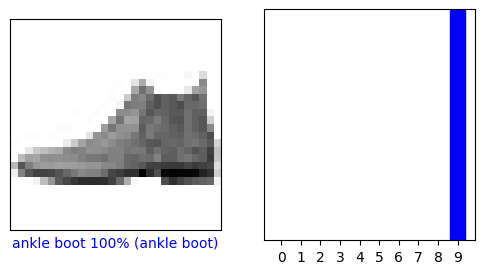

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

predicting several images

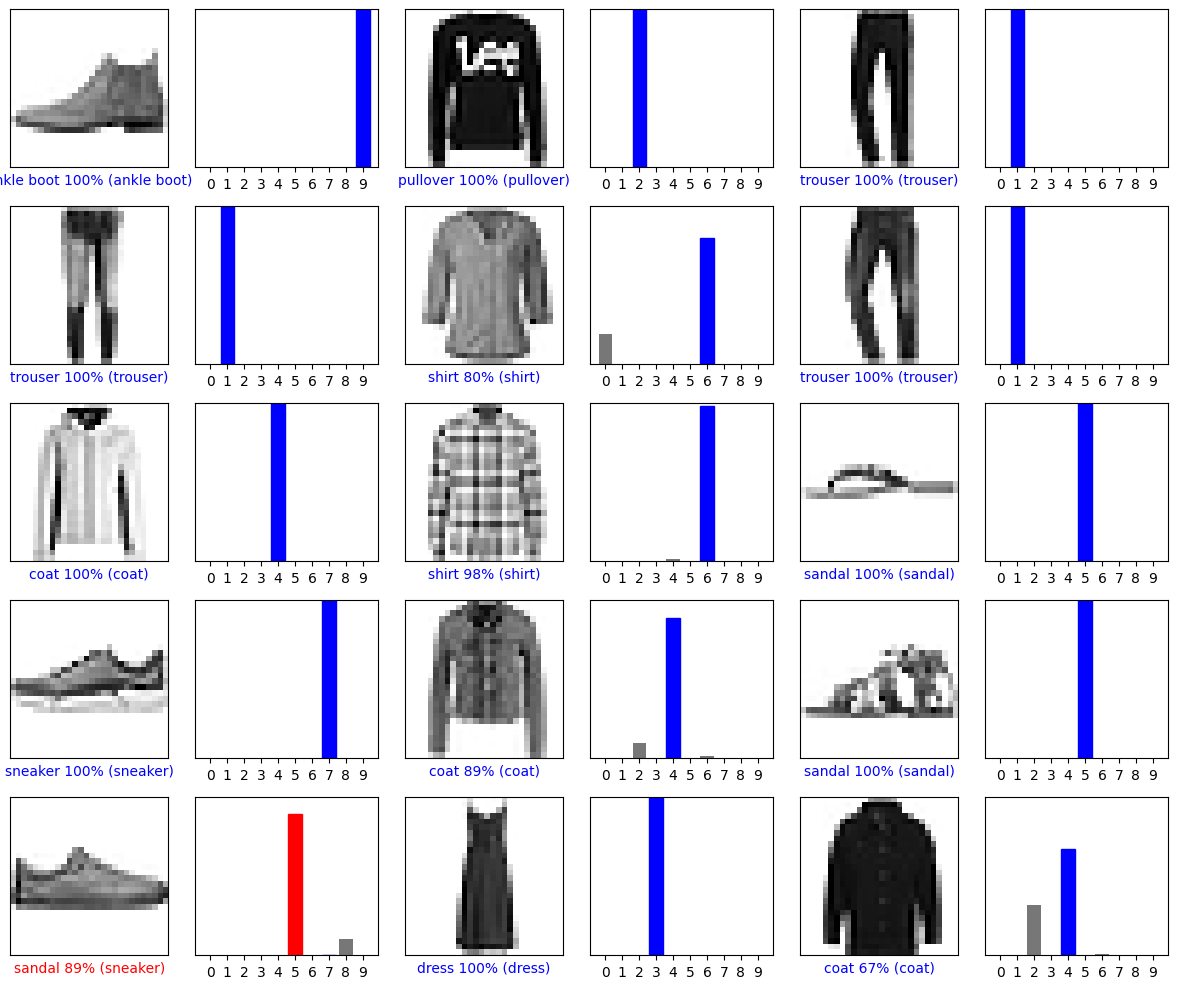

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range (num_images):
  plt.subplot(num_rows, 2*num_cols,2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

predicting a single image using the trained model

In [ ]:
img = test_images[1]
print(img.shape)


(28, 28)


In [ ]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probabilty_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.7596634e-05 8.8774020e-14 9.9799985e-01 3.4084560e-12 1.8679111e-03
  1.6979206e-11 1.1471821e-04 1.2578331e-21 2.7772633e-11 1.2056553e-16]]


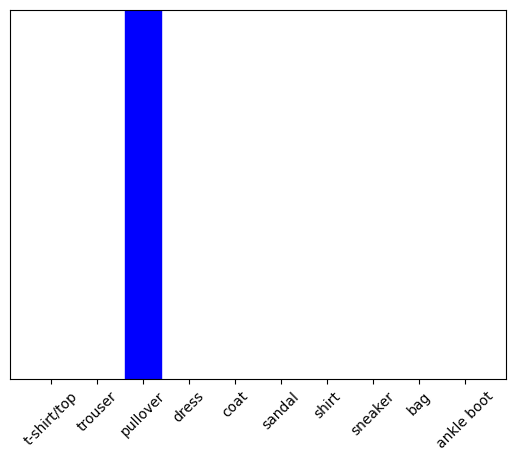

In [ ]:

plot_value_array(1,predictions_single[0], test_labels )
_ = plt.xticks(range(10),class_name ,rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2

saving and loading the model

In [ ]:
!mkdir -p saved_model1

In [ ]:
model.save('saved_model1/my_model')

In [ ]:
new_model = tf.keras.load_model('saved_model1/my_model')
new_model.summary()

AttributeError: ignored

In [ ]:
new_loss,new_acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy of new model :',new_acc)

NameError: ignored